# Titanic Disaster

Bu tekrar bölümünde, farklı özelliklere sahip tüm yolcuları listeleyen ünlü  [Titanic](https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view) veri setini inceleyeceğiz.

❓`matplotlib`, `numpy` ve `pandas` kütüphanelerini her zamanki şekilde yükleyerek başla.

In [3]:
# SENİN KODUN BURAYA
!pip install numpy pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

You should consider upgrading via the '/Users/idildundar/Desktop/data-check week10 project/data-titanic_disaster-/venv/bin/python3 -m pip install --upgrade pip' command.


❓CSV verisini yükleyip `titanic_df` adlı bir değişkene ata.

CSV dosyasına şu URL’den ulaşılabilir: https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [7]:
# SENİN KODUN BURAYA
file_id = '1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY'
url = f'https://drive.google.com/uc?id={file_id}'

# Veriyi yükle
titanic_df = pd.read_csv(url)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


❓ Veri setini her zamanki yöntemlerle incele (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

 `B` tuşuna basarak yeni hücreler eklemekten çekinme.

In [13]:
# SENİN KODUN BURAYA
titanic_df.shape
titanic_df.dtypes
titanic_df.describe()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


687 satırda  `Cabin` 687 satırda  bilgisinin eksik olduğu (NaN olduğu) görülüyor.

❓`titanic_df` içerisindeki  `Cabin` sütunundan kurtulmak için [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) fonksiyonunu kullan.

In [17]:
# SENİN KODUN BURAYA
#titanic_df = titanic_df.drop(columns=['Cabin'])
titanic_df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

## Classes Analysis

Bilet dağılımına bir göz atalım.

❓ Bir `groupby()`,kullanarak, her sınıf (1, 2 veya 3) için satılan bilet sayısını hesaplayan bir`pclass_df` dataframe oluştur.

In [19]:
# SENİN KODUN BURAYA
pclass_df = titanic_df.groupby('Pclass')[['PassengerId']].count()
pclass_df

,PassengerId
Pclass,
1,216
2,184
3,491


Sayıya bakmak çok görsel değil, veriyi bir grafikle anlamlandırmayı deneyelim.

❓ Bir önceki soruda oluşturduğun `pclass_df` dataframe’ini bir bar chart olarak plot et.

<Axes: xlabel='Pclass'>

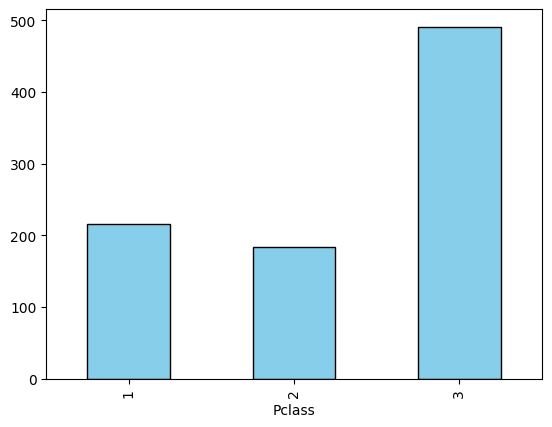

In [20]:
# SENİN KODUN BURAYA
pclass_df.plot(kind='bar', color='skyblue', edgecolor='black', legend=False)

Şimdi hayatta kalanlara **survivors** bakalım.

❓ Her yolcu sınıfının hayatta kalma oranını  *survival rate* gösteren bir bar chart plot et.
`0` ,  o sınıfta kimsenin hayatta kalmadığı, `1` ise herkesin hayatta kaldığı anlamına gelir. 

<Axes: xlabel='Pclass'>

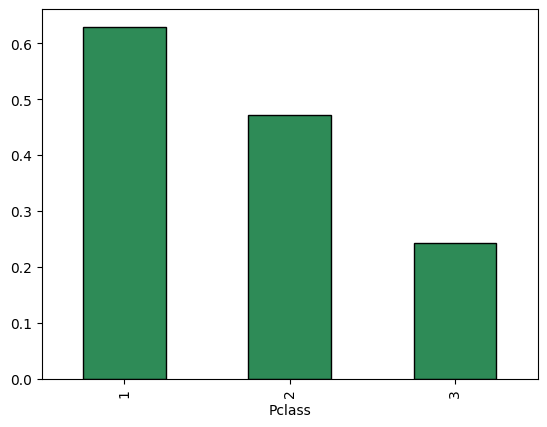

In [22]:
# SENİN KODUN BURAYA
survival_rate_by_class = titanic_df.groupby('Pclass')['Survived'].mean()

survival_rate_by_class.plot(kind='bar', color='seagreen', edgecolor='black')

### Gender Analysis

`Sex`  sütununa bir göz atalım.

❓ Bu sütunda kullanılan farklı değerleri kontrol etmek için [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) fonksiyonunu kullan.

In [24]:
# SENİN KODUN BURAYA
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

❓ Her cinsiyetin hayatta kalma oranını *survival rate*  gösteren bir bar chart plot et.
Verilere göre, hangi cinsiyetin hayatta kalma ihtimali daha yüksekti?

<Axes: xlabel='Sex'>

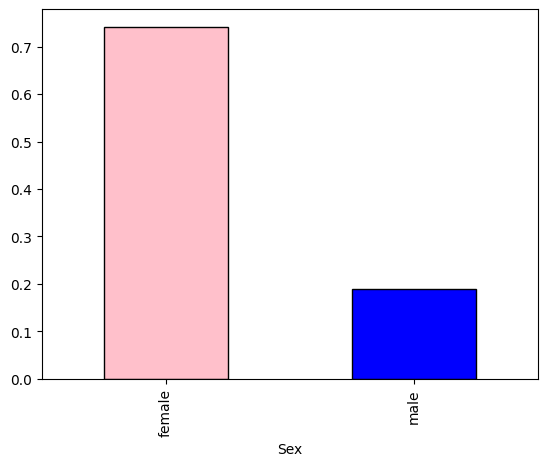

In [30]:
# SENİN KODUN BURAYA
survival_rate_by_sex = titanic_df.groupby('Sex')['Survived'].mean()

survival_rate_by_sex.plot(kind='bar', color=["pink","blue"], edgecolor='black')

Her cinsiyet için toplam yolcu sayısını ve toplam hayatta kalan sayısını birlikte gösterdiğimiz daha şık bir histogram oluşturalım.

❓`Total` ve `Survived`  olmak üzere iki sütunlu, `male` and `female` şeklinde iki satırlı bir `survivors_df` DataFrame oluştur ve plot et.

        Total  Survived
Sex                    
female    314       233
male      577       109


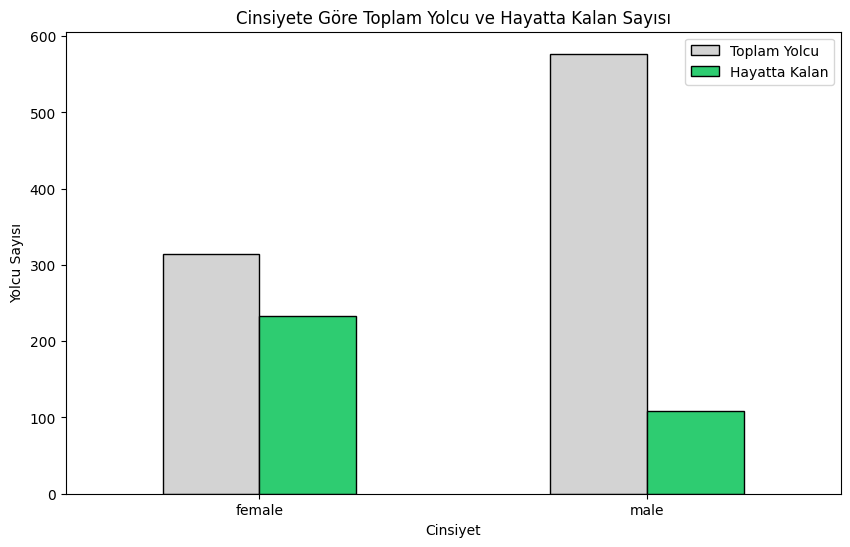

In [31]:
# SENİN KODUN BURAYA
# 1. survivors_df DataFrame'ini oluşturalım
# 'count' toplam yolcu sayısını, 'sum' ise hayatta kalan (1 olanlar) sayısını verir
survivors_df = titanic_df.groupby('Sex')['Survived'].agg(['count', 'sum'])

# 2. Sütun isimlerini 'Total' ve 'Survived' olarak değiştirelim
survivors_df.columns = ['Total', 'Survived']

# 3. Sonucu kontrol edelim
print(survivors_df)

# 4. Veriyi plot edelim
survivors_df.plot(kind='bar', figsize=(10, 6), color=['#d3d3d3', '#2ecc71'], edgecolor='black')

# Grafik başlığı ve etiketleri
plt.title('Cinsiyete Göre Toplam Yolcu ve Hayatta Kalan Sayısı')
plt.xlabel('Cinsiyet')
plt.ylabel('Yolcu Sayısı')
plt.xticks(rotation=0)
plt.legend(['Toplam Yolcu', 'Hayatta Kalan'])

plt.show()

## Children

Önceki analiz yaşları dikkate almıyordu. Bir çocuğu bir yetişkinden ayırmak ve bunun hayatta kalma oranlarını *survival rates* nasıl etkilediğini görmek istiyoruz.

❓ Boolean indexing kullanarak yalnızca çocuk yolcuların satırlarını içeren bir `children_df` oluştur.

In [32]:
# SENİN KODUN BURAYA
children_df = titanic_df[titanic_df['Age'] < 18]
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q


❓ Titanic’te kaç çocuk vardı?

In [34]:
# SENİN KODUN BURAYA
children_df.shape

(113, 11)

❓Kaç çocuk hayatta kaldı?

In [38]:
# SENİN KODUN BURAYA
children_survided_df= children_df[children_df['Survived'] > 0]
children_survided_df.shape


(61, 11)

❓ Her kategori için( `male`, `female`, `children`).hayatta kalanlar / toplam oranını gösteren bir bar chart plot et. Unutma: `male` istatistiklerinden erkek çocukları, `female` istatistiklerinden ise kız çocukları çıkarman **substract** gerekiyor.

Person
child     0.539823
female    0.752896
male      0.165703
Name: Survived, dtype: float64


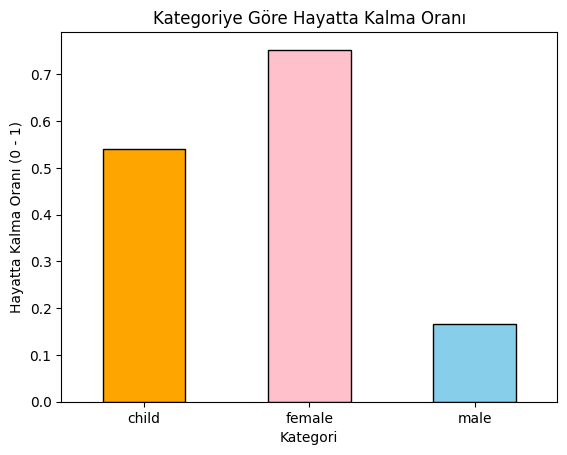

In [39]:
# SENİN KODUN BURAYA
# 1. 'Person' adında yeni bir sütun oluşturalım. 
# Varsayılan olarak cinsiyet bilgisini (male/female) alalım.
titanic_df['Person'] = titanic_df['Sex']

# 2. Yaşı 18'den küçük olanların 'Person' değerini 'child' olarak değiştirelim.
# Bu işlem otomatik olarak erkek çocuklarını 'male'den, kız çocuklarını 'female'den ayırır.
titanic_df.loc[titanic_df['Age'] < 18, 'Person'] = 'child'

# 3. Her kategorinin hayatta kalma oranını (survival rate) hesaplayalım
person_survival_rate = titanic_df.groupby('Person')['Survived'].mean()

# Sonuçları görelim
print(person_survival_rate)

# 4. Bar chart olarak plot edelim
person_survival_rate.plot(kind='bar', color=['orange', 'pink', 'skyblue'], edgecolor='black')

plt.title('Kategoriye Göre Hayatta Kalma Oranı')
plt.xlabel('Kategori')
plt.ylabel('Hayatta Kalma Oranı (0 - 1)')
plt.xticks(rotation=0)
plt.show()

## [Opsiyonal] Big families

❓ Daha büyük ailelerin hayatta kalması daha mı zordu?

Burada, yolcunun aile büyüklüğünü gösteren yeni bir sütunu `DataFrame` ine ekleyeceksin.
  

In [ ]:
# SENİN KODUN BURAYA

## [Opsiyonal] Distinguished titles

❓ Tahliye sırasında ünvanı (Mr, Mrs, Dr vb.) olan yolculara daha fazla öncelik verildi mi?

Bunu incelemek için, bazı string manipülasyonları yaparak her yolcu için ünvanını içeren yeni bir sütun oluştur.

In [ ]:
# SENİN KODUN BURAYA